<a href="https://colab.research.google.com/github/himanshukumarmishra23cs176/MLPrac1/blob/main/23_CS_176_HimanshuKumarMishra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Load and explore the Iris dataset**

In [1]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

In [2]:
iris_df = pd.DataFrame(X, columns=feature_names)
iris_df['species'] = [target_names[i] for i in y]

In [4]:
print("Iris Dataset")
print(f"Number of samples: {X.shape[0]}")
print(f"Number of features: {X.shape[1]}")
print(f"Feature names: {feature_names}")
print(f"Target classes: {target_names}\n")

Iris Dataset
Number of samples: 150
Number of features: 4
Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target classes: ['setosa' 'versicolor' 'virginica']



**Visualize features using pairplots, heatmaps representing correlation values and box plots.**

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

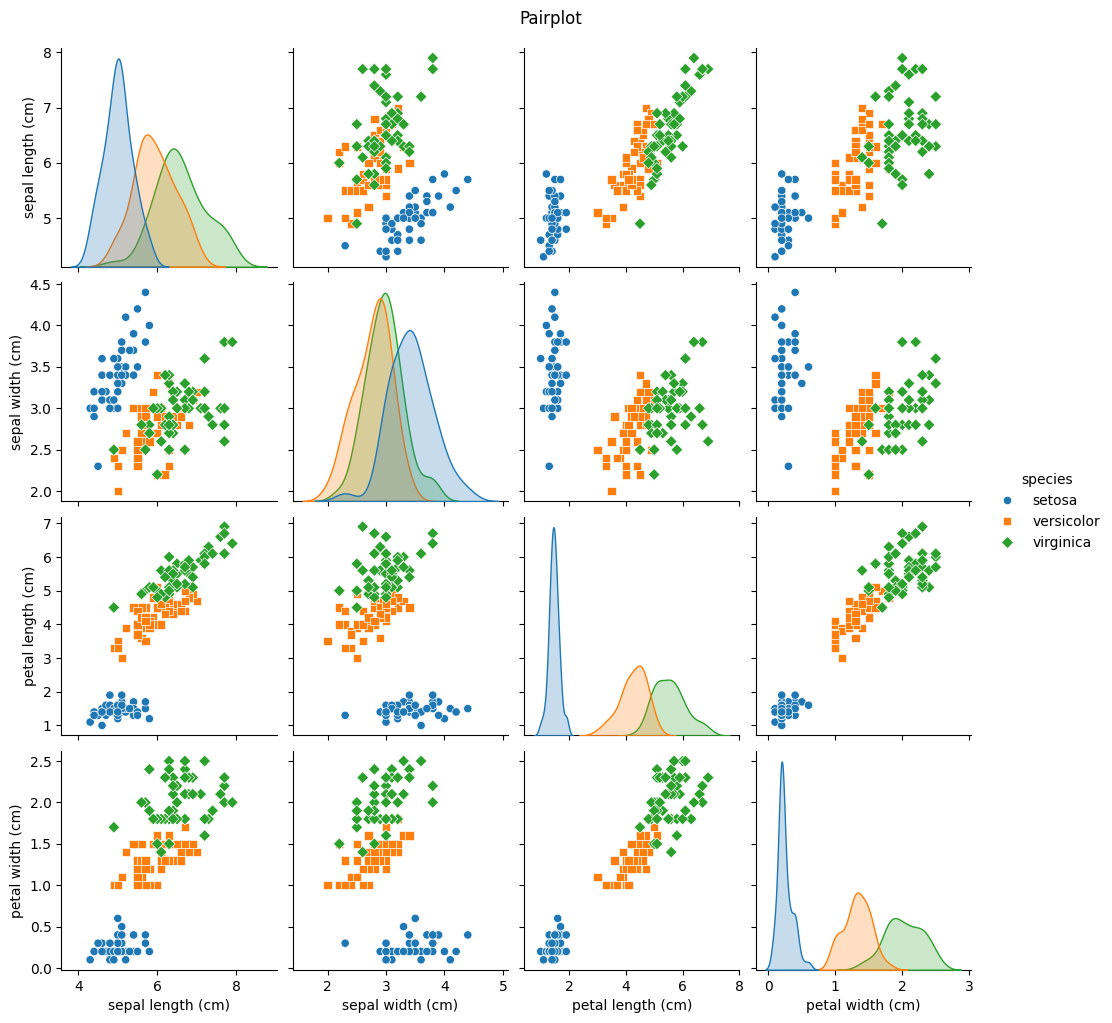

In [6]:
sns.pairplot(iris_df, hue='species', markers=['o', 's', 'D'])
plt.suptitle("Pairplot", y=1.02)
plt.savefig('iris_pairplot.png')
plt.show()

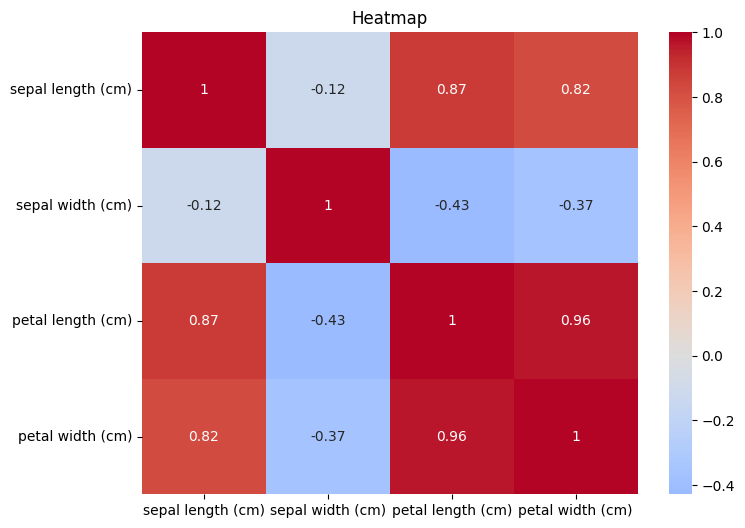

In [7]:
plt.figure(figsize=(8,6))
corr = iris_df.iloc[:,:4].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title("Heatmap")
plt.savefig('iris_heatmap.png')
plt.show()

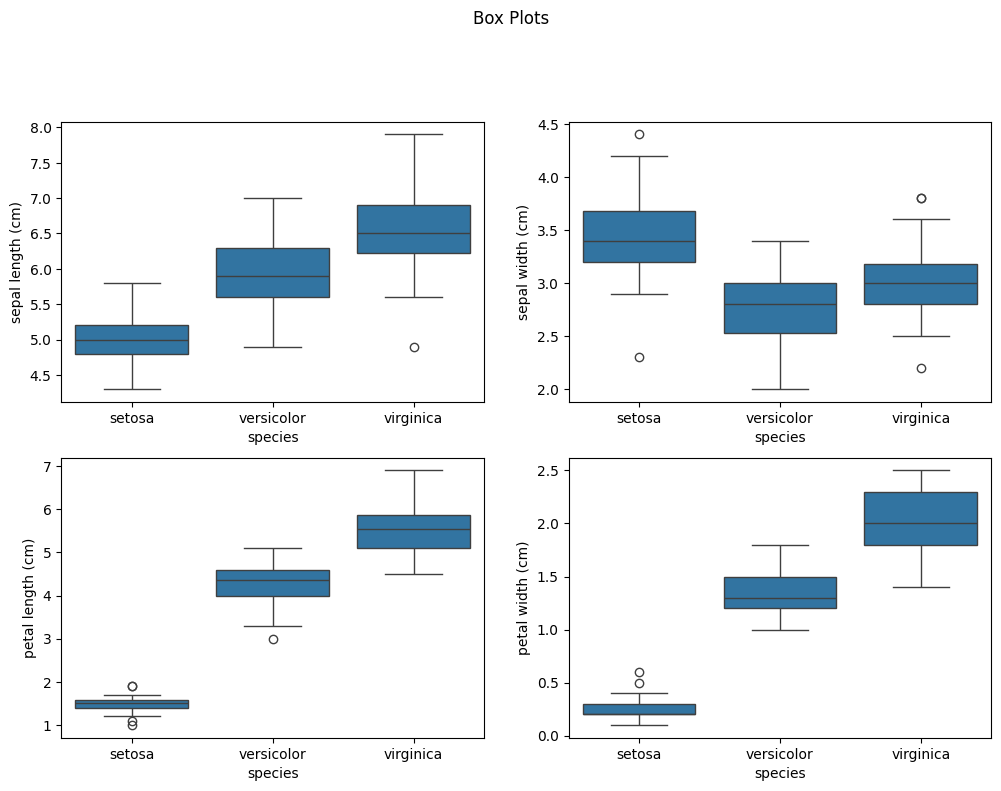

In [8]:
plt.figure(figsize=(12,8))
for i, feature in enumerate(feature_names):
    plt.subplot(2,2,i+1)
    sns.boxplot(x='species', y=feature, data=iris_df)
plt.suptitle("Box Plots", y=1.02)
plt.savefig('iris_boxplots.png')
plt.show()

**Train and test a KNN classifier**

In [11]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (accuracy_score, precision_score,
                           recall_score, f1_score, classification_report)
import numpy as np
import pandas as pd

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [13]:
def show_distance_example():
    sample1 = X_train[0]
    sample2 = X_train[1]
    euclidean_dist = np.sqrt(np.sum((sample1 - sample2)**2))
    print(f"\nEuclidean distance between Sample 1 and 2: {euclidean_dist:.2f}")
    print(f"Sample 1 features: {sample1}")
    print(f"Sample 2 features: {sample2}")

show_distance_example()


Euclidean distance between Sample 1 and 2: 1.93
Sample 1 features: [5.1 2.5 3.  1.1]
Sample 2 features: [6.2 2.2 4.5 1.5]


In [16]:
k_values = [1, 3, 5, 7]
results = []

for k in k_values:
    print(f"\nEvaluating k={k}\n")

    knn = KNeighborsClassifier(n_neighbors=k)

    cv = KFold(n_splits=5, shuffle=True, random_state=42)
    cv_scores = cross_val_score(knn, X_train, y_train, cv=cv, scoring='accuracy')

    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    y_proba = knn.predict_proba(X_test)

    results.append({
        'k': k,
        'avg_accuracy': np.mean(cv_scores),
        'precision': precision_score(y_test, y_pred, average='weighted'),
        'recall': recall_score(y_test, y_pred, average='weighted'),
        'f1': f1_score(y_test, y_pred, average='weighted')
    })

    print(f"\nClass probabilities for first test sample (k={k}):")
    for class_idx, prob in enumerate(y_proba[0]):
        print(f"{iris.target_names[class_idx]}: {prob:.4f}")

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=iris.target_names))


Evaluating k=1


Class probabilities for first test sample (k=1):
setosa: 0.0000
versicolor: 0.0000
virginica: 1.0000

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.83      1.00      0.91        15
   virginica       1.00      0.80      0.89        15

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.94      0.93      0.93        45


Evaluating k=3


Class probabilities for first test sample (k=3):
setosa: 0.0000
versicolor: 0.0000
virginica: 1.0000

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.88      1.00      0.94        15
   virginica       1.00      0.87      0.93        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighte

In [17]:
print("\nFinal Metrics Summary")
results_df = pd.DataFrame(results)
print(results_df.to_markdown(index=False))


Final Metrics Summary
|   k |   avg_accuracy |   precision |   recall |       f1 |
|----:|---------------:|------------:|---------:|---------:|
|   1 |       0.971429 |    0.944444 | 0.933333 | 0.93266  |
|   3 |       0.952381 |    0.960784 | 0.955556 | 0.955357 |
|   5 |       0.971429 |    0.979167 | 0.977778 | 0.977753 |
|   7 |       0.980952 |    0.960784 | 0.955556 | 0.955357 |
